In [109]:
#import pandas library
import pandas as pd

In [110]:
# Reading data from CSV file
data = pd.read_csv('rfm_analysis_data.csv')


data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [111]:
# Convert "InvoiceDate" columns to date format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["InvoiceDate"] = data["InvoiceDate"].dt.date

In [112]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


In [113]:
# Getting the latest purchase date from all data
today_date = data["InvoiceDate"].max()
print(today_date)

2011-12-09


In [114]:
#Display general statistics of the data
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [115]:
#Removing rows with negative quantity values
data = data[data['Quantity'] > 0]

#Removing rows with negative price values
data = data[data['Price'] > 0]

In [116]:
##Checking data on null values
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236122
Country             0
dtype: int64

In [117]:
data[data['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09,10.79,NaN,United Kingdom


In [118]:
# Removing rows with absent 'Customer ID' value
data.dropna(subset=['Customer ID'], how='all', inplace=True)
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [120]:
# Group data by 'Customer ID' and calculation of the RECENCY of the latest purchase 
recency = (today_date - data.groupby("Customer ID").agg({"InvoiceDate": "max"}))
recency.rename(columns={"InvoiceDate": "Recency"}, inplace=True)

# Tranforming values in day-value
recency_df = recency["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
Name: Recency, dtype: int64

In [121]:
# Group data by 'Customer ID' to purchase FREQUENCY calculation
freq_df = data.groupby("Customer ID").agg({"Invoice": "nunique"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace=True)
freq_df.head()

,Frequency
Customer ID,
12346.0,12
12347.0,8
12348.0,5
12349.0,4
12350.0,1


In [122]:
#Check the result
data[data['Customer ID'] == 12350].Invoice.nunique()

1

In [123]:
# Calculation of TotalPrice 
data["TotalPrice"] = data["Quantity"] * data["Price"]

# Calculation of the TotalPrice for each customer (Monetary Values)
monetary_df = data.groupby("Customer ID").agg({"TotalPrice": "sum"})
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12346.0,77556.46
12347.0,5633.32
12348.0,2019.40
12349.0,4428.69
12350.0,334.40


In [124]:
#Check the result
data[data['Customer ID'] == 12350.0].TotalPrice.sum()

334.40000000000003

In [125]:
# Gathering all the RFM metrics in one dataframe 
rfm = pd.concat([recency_df, freq_df, monetary_df], axis=1).reset_index()
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,310,1,334.40


In [126]:
# Assign scores dividing value ranges of the RFM metrics by quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1])  # Чем меньше давность, тем выше балл
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 3, labels=[1, 2, 3])  # Чем больше частота, тем выше балл
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])   # Чем больше сумма покупок, тем выше балл

In [127]:
# Joining each metric score together by Customer ID
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [128]:
rfm

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,12,77556.46,1,3,3,133
1,12347.0,2,8,5633.32,3,3,3,333
2,12348.0,75,5,2019.40,2,2,3,223
3,12349.0,18,4,4428.69,3,2,3,323
4,12350.0,310,1,334.40,1,1,1,111
...,...,...,...,...,...,...,...,...
5873,18283.0,3,22,2736.65,3,3,3,333
5874,18284.0,431,1,461.68,1,1,1,111
5875,18285.0,660,1,427.00,1,1,1,111
5876,18286.0,476,2,1296.43,1,1,2,112


In [129]:
# Disaply of the customers with max RFM score 
rfm[rfm["RFM_Score"] == "333"].head()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
1,12347.0,2,8,5633.32,3,3,3,333
6,12352.0,36,10,2849.84,3,3,3,333
10,12356.0,22,6,6373.68,3,3,3,333
16,12362.0,3,11,5356.23,3,3,3,333
34,12380.0,21,11,9676.30,3,3,3,333


In [130]:
#Data visualization: quantity of the customers in segments of Recency and Frequency 
#The heat map shows the number of customers in segments (champions, loyal, recent customers, about to sleep, sleeping, lost.

In [131]:
#Count number of customers in each segment (R,F)
rfm_categ_size = rfm.groupby(['R_Score', 'F_Score'], as_index=False).agg({'Customer ID': 'count'})
rfm_categ_size

,R_Score,F_Score,Customer ID
0,3,1,386
1,3,2,485
2,3,3,1099
3,2,1,744
4,2,2,630
5,2,3,576
6,1,1,1437
7,1,2,395
8,1,3,126


In [132]:
#Make pivot table 
rfm_quantity_pivot = rfm_categ_size.pivot_table(
    index='F_Score',
    columns='R_Score',
    values='Customer ID',
    aggfunc='mean'
)
rfm_quantity_pivot

R_Score,3,2,1
F_Score,,,
1,386,744,1437
2,485,630,395
3,1099,576,126


In [133]:
#Create heat map, displaying number of customers in segments(R,F)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

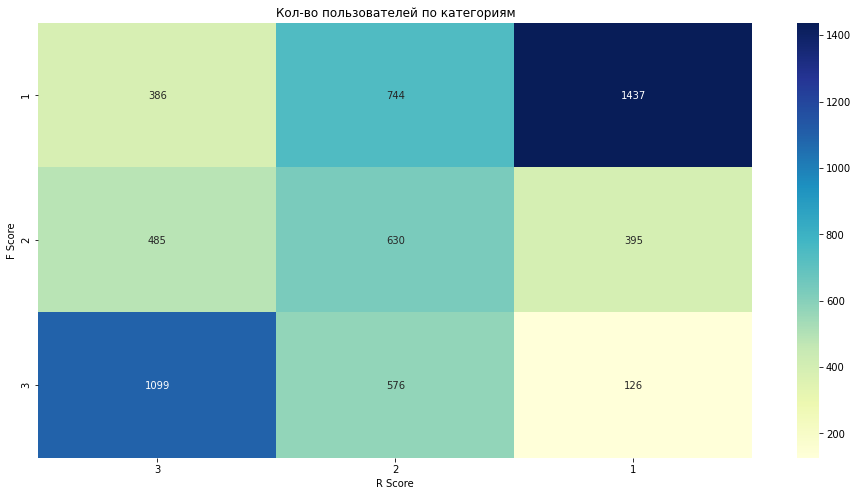

In [136]:
plt.figure(figsize=(16,8))
sns.heatmap(rfm_quantity_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Кол-во пользователей по категориям")
plt.xlabel("R Score")
plt.ylabel("F Score")
plt.show()

In [137]:
#Based on the analysis, I identified a category of champions (R=3, F=3) (1099 users) -
#these are the most valuable customers who have recently made purchases, buy frequently, and spend a lot. 
#These customers are a priority for retention and development.
#For this, it is recommended to launch targeted marketing campaigns, such as loyalty programs and additional sales.